In [1]:
#Lista 5
#Discente: Mércia Regina da Silva 
#Matricula: 201811250047


import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

In [3]:
#Questão 1

def newton(f, f_derivada, a, tol=1e-10, maxiter=200):
    y =  a 
    cont = 0
    erro = 100
    
    while (erro > tol and cont < maxiter):
        f_y = f(y)
        derivada_y = f_derivada(y)
        
        if derivada_y == 0:
            return 
        
        y2 = y - (f_y / derivada_y)  
        erro = np.abs((y2 - y) / np.abs(y2))  
        
        if erro <= tol:
            break 
        
        y = y2
        cont += 1

    return "Raiz: " + str(y2)

def pontof(f, a, maxiter, xtol=1e-10):
    cont = 0
    
    while (cont < maxiter):
        y = f(a)
        erro = np.abs(a - y)
        
        if erro <= xtol:
            a, y, cont
        
        a = y
        cont += 1
    return a, y, cont

def sec(f, a, b, tol = 1e-10, maxiter = 200):
    if f(a) * f(b) >= 0:
        return
    
    erro = 1000;
    cont = 0
    
    while (erro > tol and cont < maxiter):
        f_a = f(a)
        f_b = f(b)
        y = (a * f_b - b * f_a) / (f_b - f_a)
        x = f_a * f(y)
        
        if (x == 0):
            return y, cont
        else:
            a = b
            b = y
            y2 = y
            erro = np.abs(y2 - y)
            
        if (erro <= tol):
            break  
        cont += 1

    return "Raiz: " + str(y2)

def falsa(f, a, b, tol, maxiter):
    
    x2 = a - (f(a)*(b-a)/(f(b)-f(a)))
    cont = 0
    erro = 1 
    
    while (erro > tol and cont < maxiter):
        
        x = a - (f(a)*(b-a)/(f(b)-f(a)))
        
        if (np.sign(f(a)) * np.sign(f(x2)) > 0) : a = x

        else: b = x
            
        if( cont != 0):
            erro  = np.abs(x - x2)/x 
        
        cont += 1      
        x2 = x
         
    return "Iteração: " + str(cont), "Raiz: " + str(x2)

In [4]:
#Questão 2

def function(x): 
  return (2 * np.sin(np.sqrt(x)) - x)

pontof(function, a = 0.5, maxiter = 200, xtol = 0.001)

(0.7686488567609493, 0.7686488567609493, 200)

In [5]:
#Questão 3

def rreal(x): 
  return (2*(x**3) - 11.7*(x**2) + 17.7*x - 5)

def rreal_iso(x): 
  return (2*(x**3) - 11.7*(x**2) + 18.7*x - 5)

def rreal_derivada(x): 
  return (6*(x**2) - 23.4*(x) + 17.7)

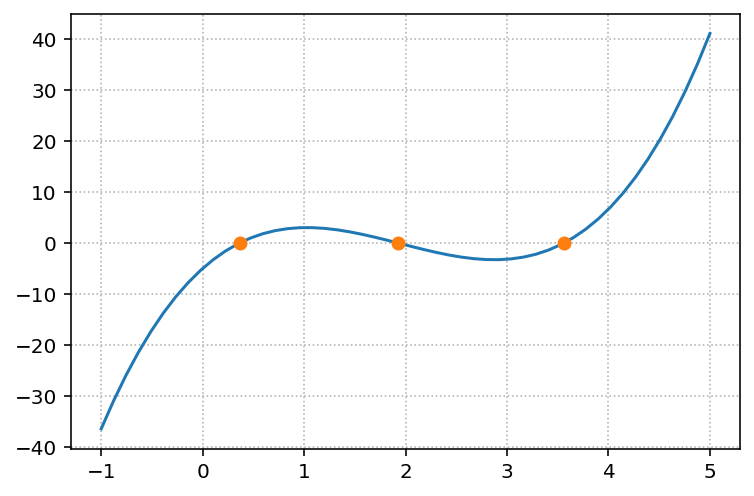

In [6]:
#Letra A

r1 = opt.root(rreal, 0)
r2 = opt.root(rreal, 2)
r3 = opt.root(rreal, 3)
rtotal = np.array([r1.x, r2.x, r3.x])

fig = plt.figure()
a = fig.add_subplot()

x = np.linspace(-1,5)
plt.plot(x,rreal(x))
a.plot(rtotal, rreal(rtotal), 'o')
plt.grid(ls=':')

In [7]:
#Letra B

pontof(rreal, 3, 3)

(-30850678.958379168, -30850678.958379168, 3)

In [8]:
#Letra C

newton(rreal, rreal_derivada, 3, maxiter=3)

'Raiz: 3.7929344806432264'

In [11]:
#Letra D

sec(rreal, 4, 3, 3)

'Raiz: 3.326530612244898'

In [12]:
#Questão 4

#Letra A

def f1(x): 
  return (2*(x**4) + 4*(x**3) + 3*(x**2) - 10*x - 15)
def f1_iso(x): 
  return ((15)/(2*(x**3) + 4*(x**2) + 3*(x) - 10))
def f1_der(x): 
  return  (8*(x**3) + 12*(x**2) + 6*x - 10)

In [13]:
#Bisseção

%timeit opt.root_scalar(f1, method='bisect', bracket=[0,3], rtol = 10**(-10), maxiter = 200 )
opt.root_scalar(f1, method='bisect', bracket=[0,3], rtol = 10**(-10), maxiter = 200)

50 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.4928787086100783

In [14]:
#Falsa posição

%timeit falsa(f1, 0, 3, 1e-10, 200)
falsa(f1, 0, 3, 1e-10, 200)

772 µs ± 96.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


('Iteração: 64', 'Raiz: 1.492878708406769')

In [15]:
#Ponto fixo

%timeit opt.fixed_point(f1_iso, 1.5, xtol = 10**(-10), maxiter = 200)
opt.fixed_point(f1_iso, 1.5, xtol = 10**(-10), maxiter = 200)

978 µs ± 155 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(1.49287871)

In [16]:
#Método de Newton-Raphson

%timeit opt.root_scalar(f1, fprime = f1_der, x0 = 1.5, method='newton', maxiter = 200)
opt.root_scalar(f1, fprime = f1_der, x0 = 1, method='newton', maxiter = 200)

228 µs ± 26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 1.4928787086636037

In [17]:
#Método da Secante

%timeit opt.root_scalar(f1, x0 = 0, x1 = 3, method='secant', maxiter = 200)
opt.root_scalar(f1, x0= 0, x1 = 3, method='secant', maxiter = 200)

788 µs ± 112 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: -1.3003841326439196

In [18]:
#Questão 4
#Letra B

def f2(x): 
  return ((x + 3)*(x + 1)*(x - 2)**3)
def f2_iso(x): 
  return ((24)/((x**4) - 2*(x**3) - 9*(x**2) + 22*x + 4))
def f2_der(x): 
  return (2*x*(x-2)**3 + 4*(x-2)**3 + 3*(x)**4 - 27*(x)**2 + 12*x + 36)

In [19]:
#Método da Bisseção

%timeit opt.root_scalar(f2, method='bisect', bracket=[0,5], rtol = 10**(-10), maxiter = 200)
opt.root_scalar(f2, method='bisect', bracket=[0,5], rtol = 10**(-10), maxiter = 200)

45.5 µs ± 7.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.9999999999708962

In [20]:
#Método da falsa posição

%timeit falsa(f2, 0, 5, 1e-10, 200)
falsa(f2, 0, 5, 1e-10, 200)

1.87 ms ± 436 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


('Iteração: 200', 'Raiz: 1.714409136227646')

In [21]:
#Método do ponto fixo

%timeit opt.fixed_point(f2_iso, 1.5, xtol = 10**(-10), maxiter = 200)
opt.fixed_point(f2_iso, 1.5, xtol = 1e-10, maxiter = 200)

3.88 ms ± 615 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


array(1.99964491)

In [22]:
#Método de Newton-Raphson

%timeit opt.root_scalar(f2, fprime = f2_der, x0 = 0, method='newton', maxiter = 200)
opt.root_scalar(f2, fprime = f2_der, x0 = 0, method='newton', maxiter = 200)

3.11 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 100
     iterations: 50
           root: 2.0000000167022742

In [23]:
#Método da Secante

%timeit opt.root_scalar(f2, x0 = 0, x1 = 5, method='secant', maxiter = 200)
opt.root_scalar(f2, x0 = 0, x1 = 5, method='secant', maxiter = 200)

4.31 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 61
     iterations: 60
           root: 2.00000003865488

In [24]:
#Questão 4
#Letra C

def f3(x): 
  return (5*x**3 + x**2 - np.e**(1-2*x) + np.cos(x) + 20)
def f3_iso(x): 
  return (5*x**3 + x**2 - np.e**(1-2*x) + np.cos(x) + 20 + x)
def f3_der(x): 
  return (15*(x**2) + 2*x + 2*np.e**(1 - 2*x) - np.sin(x))

In [25]:
#Método da Bisseção

%timeit opt.root_scalar(f3, method='bisect', bracket=[-5,5], rtol = 10**(-10), maxiter =200)
opt.root_scalar(f3, method='bisect', bracket=[-5,5], rtol = 10**(-10), maxiter = 200)

149 µs ± 9.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 39
     iterations: 37
           root: -0.9295604598446516

In [26]:
#Método da falsa posição

%timeit falsa(f3, -5, 5, 1e-10, 200)
falsa(f3, -5, 5, 1e-10, 200)

7.3 ms ± 920 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


('Iteração: 200', 'Raiz: 1.568769261078005')

In [27]:
#Método do ponto fixo

%timeit opt.fixed_point(f3_iso,-1, xtol = 10**(-10), maxiter = 200)
opt.fixed_point(f3_iso, -1, xtol = 10**(-10), maxiter = 200)

8.15 ms ± 968 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


array(-0.92956046)

In [28]:
#Método de Newton-Raphson

%timeit opt.root_scalar(f3, fprime = f3_der, x0 = 4, method='newton', maxiter = 200)
opt.root_scalar(f3, fprime = f3_der, x0 = 4, method='newton', maxiter = 200)

1.16 ms ± 66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 28
     iterations: 14
           root: -0.9295604598378413

In [29]:
#Método da Secante

%timeit opt.root_scalar(f3, x0= -1, x1 = 1, method='secant', maxiter = 200)
opt.root_scalar(f3, x0= -1, x1 = 1, method='secant', maxiter = 200)

726 µs ± 31.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: -0.9295604598378413

In [30]:
#Questão 4
#Letra D

def f4(x):
   return (np.sin(x)*x + 4)
def f4_iso(x): 
  return ((-4)/np.sin(x))
def f4_der(x): 
  return (x*np.cos(x) + np.sin(x))

In [31]:
#Método da Bisseção

%timeit opt.root_scalar(f4, method='bisect', bracket=[1,5], rtol = 10**(-10), maxiter = 200)
opt.root_scalar(f4, method='bisect', bracket=[1,5], rtol = 10**(-10), maxiter = 200)

116 µs ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 4.323239543708041

In [35]:
#Método da falsa posição

%timeit falsa(f4, 1, 5, 1e-10, 200)
falsa(f4, 1, 5, 1e-10, 200)

243 µs ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


('Iteração: 10', 'Raiz: 4.323239543723117')

In [36]:
#Método do ponto fixo

%timeit opt.fixed_point(f4_iso, 4, xtol = 10**(-10), maxiter = 200)
opt.fixed_point(f4_iso, 4, xtol = 10**(-10), maxiter = 200)

1.98 ms ± 536 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


array(4.32323954)

In [34]:
#Método de Newton-Raphson

%timeit opt.root_scalar(f4, fprime = f4_der, x0 = 4, method='newton', maxiter = 200)
opt.root_scalar(f4, fprime = f4_der, x0 = 4, method='newton',maxiter = 200)

439 µs ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 5
           root: 4.323239543713714

In [37]:
#Método da Secante

%timeit opt.root_scalar(f4, x0 = 4, x1 = 5, method='secant', maxiter = 200)
opt.root_scalar(f4, x0 = 4, x1 = 5, method='secant', maxiter = 200)

638 µs ± 204 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 4.323239543713714

In [38]:
#Questão 4
#Letra E

def f5(x): 
  return ((x-3)**5 * np.log(x))
def f5_iso(x): 
  return ((x-3)**5 * np.log(x) + x)
def f5_der(x): 
  return (20*(4*x -3)**4 +((4*x -3)**5)/x)

In [39]:
#Método da Bisseção

%timeit opt.root_scalar(f5, method='bisect', bracket=[2,5], rtol = 10**(-10), maxiter = 200)
opt.root_scalar(f5, method='bisect', bracket=[2,5], rtol = 10**(-10), maxiter = 200)

The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached.
158 µs ± 102 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 2.9999999999417923

In [40]:
#Método da falsa posição

%timeit falsa(f5, 2, 5, 1e-10, 200)
falsa(f5, 2, 5, 1e-10, 200)

6.74 ms ± 841 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


('Iteração: 200', 'Raiz: 2.5939097642054603')

In [41]:
#Método do ponto fixo

try: 
    %timeit opt.fixed_point(f5_iso, 2.5, xtol = 10**(-10), maxiter = 200)
    print(opt.fixed_point(f5_iso, 2.5, xtol = 10**(-10), maxiter = 200))
    
except RuntimeError as e:
    print(e)

Failed to converge after 200 iterations, value is 2.989033570607521


In [42]:
#Método de Newton-Raphson

%timeit opt.root_scalar(f5, fprime = f5_der, x0 = 2.9, method='newton',maxiter = 200)
opt.root_scalar(f5, fprime = f5_der, x0 = 2.9, method='newton', maxiter = 200)

99.8 µs ± 5.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 2
     iterations: 1
           root: 2.9000000000847543

In [43]:
#Método da Secante

%timeit opt.root_scalar(f5, x0 = 2.9, x1 = 3.5, method='secant', maxiter = 200)
opt.root_scalar(f5, x0 = 2.9, x1 = 3.5, method='secant', maxiter = 200)

6.85 ms ± 556 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 93
     iterations: 92
           root: 2.9999999155028503

In [44]:
#Questão 4
#Letra F

def f6(x): 
  return ((x)**10 -1)
def f6_iso(x): 
  return  (1/(x)**9)
def f6_der(x): 
  return (10*(x)**9)

In [45]:
#Método da Bisseção

%timeit opt.root_scalar(f6, method='bisect', bracket=[0.8,1.2], rtol = 10**(-10), maxiter = 200)
opt.root_scalar(f6, method='bisect', bracket=[0.8,1.2], rtol = 10**(-10), maxiter = 200)

16.5 µs ± 2.66 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 1
           root: 1.0

In [46]:
#Método da falsa posição

%timeit falsa(f6, 0.8, 1.2, 1e-10, 200)
falsa(f6, 0.8, 1.2, 1e-10, 200)

475 µs ± 219 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


('Iteração: 45', 'Raiz: 0.9999999999002991')

In [47]:
#Método do ponto fixo

%timeit opt.fixed_point(f6_iso, 1, xtol = 10**(-10), maxiter = 200)
opt.fixed_point(f6_iso, 1, xtol = 10**(-10), maxiter = 200)

275 µs ± 58.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(1.)

In [48]:
#Método de Newton-Raphson

%timeit opt.root_scalar(f6, fprime = f6_der, x0 = 0.5, method='newton',maxiter = 200)
opt.root_scalar(f6, fprime = f6_der, x0 = 0.5, method='newton', maxiter = 200)

3.06 ms ± 566 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 86
     iterations: 43
           root: 1.0

In [49]:
#Método da Secante

%timeit opt.root_scalar(f6, x0= 0.8, x1 = 1.2, method='secant', maxiter = 200)
opt.root_scalar(f6, x0 = 0.8, x1 = 1.2, method='secant', maxiter = 200)

685 µs ± 62.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 0.9999999999999333